In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# open the mesh mask and use it to mask the land
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

# get the bathymetry file
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

In [3]:
# ds = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_tracers_20180101_20181231.nc')
ds = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_tracers_subsection_20180101_20181231.nc')

(0.0, 898.0)

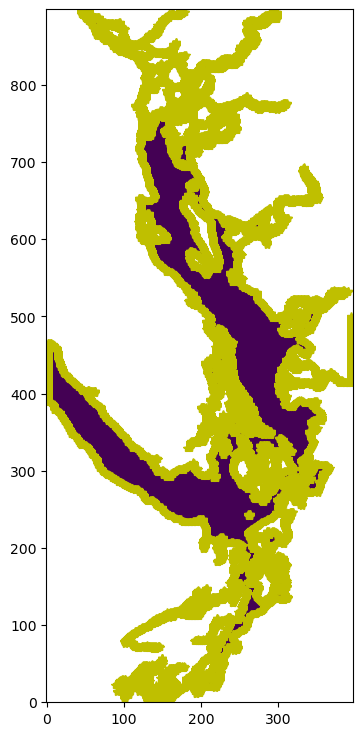

In [4]:
mesh_masked = np.ma.masked_array(tmask[0, :, :], mask=tmask[0, :, :])

## This one finds the land coastal points
array = np.array(1 - tmask[0])

# Calculate the differences along the specified axis in specific direction
diffs_up = array - np.roll(array, 1, axis=0)
diffs_down = array - np.roll(array, -1, axis=0)
diffs_left = array - np.roll(array, 1, axis=1)
diffs_right = array - np.roll(array, -1, axis=1)

diffs_ul = array - np.roll(np.roll(array, 1, axis=0), 1, axis=1)
diffs_ur = array - np.roll(np.roll(array, 1, axis=0), -1, axis=1)
diffs_ll = array - np.roll(np.roll(array, -1, axis=0), 1, axis=1)
diffs_lr = array - np.roll(np.roll(array, -1, axis=0), -1, axis=1)

# Find the indices where transitions occur from land to water
idx_up = np.argwhere(diffs_up == 1)
idx_down = np.argwhere(diffs_down == 1)
idx_left = np.argwhere(diffs_left == 1)
idx_right = np.argwhere(diffs_right == 1)

idx_ul = np.argwhere(diffs_ul == 1)
idx_ur = np.argwhere(diffs_ur == 1)
idx_ll = np.argwhere(diffs_ll == 1)
idx_lr = np.argwhere(diffs_lr == 1)

idx_unique = np.unique(np.concatenate((idx_up, idx_down, idx_left, idx_right, idx_ul, idx_ur, idx_ll, idx_lr)), axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(5, 9))
ax.imshow(mesh_masked)

ax.plot(idx_unique[1], idx_unique[0], 'y*')

ax.set_ylim([0,898])
# ax.set_xlim([280, 320])
# ax.set_ylim([480, 520])

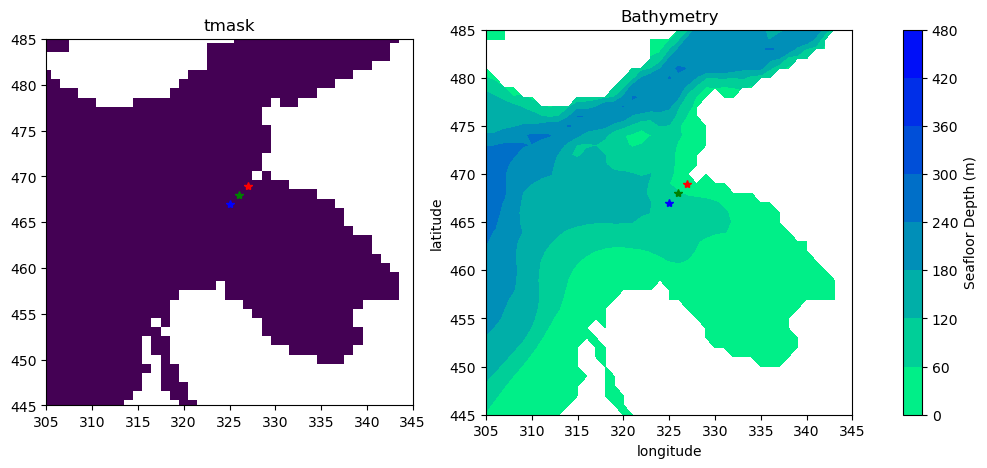

In [5]:
near_point = [327, 469]
near_point_1shift = [326, 468]
near_point_2shift = [325, 467]

fig, ax = plt.subplots(1, 2, figsize=(13, 5))

ax[0].imshow(mesh_masked)
ax[0].set_title('tmask')

ax[0].plot(near_point[0], near_point[1], 'r*')
ax[0].plot(near_point_1shift[0], near_point_1shift[1], 'g*')
ax[0].plot(near_point_2shift[0], near_point_2shift[1], 'b*')

ax[0].set_xlim([305, 345])
ax[0].set_ylim([445, 485])


colours = ax[1].contourf(bathy.Bathymetry, cmap='winter_r')
ax[1].set_xlabel('longitude')
ax[1].set_ylabel('latitude')
ax[1].set_title('Bathymetry')

ax[1].plot(near_point[0], near_point[1], 'r*')
ax[1].plot(near_point_1shift[0], near_point_1shift[1], 'g*')
ax[1].plot(near_point_2shift[0], near_point_2shift[1], 'b*')

ax[1].set_xlim([305, 345])
ax[1].set_ylim([445, 485])

cb = fig.colorbar(colours, ax=ax)
cb.set_label('Seafloor Depth (m)')

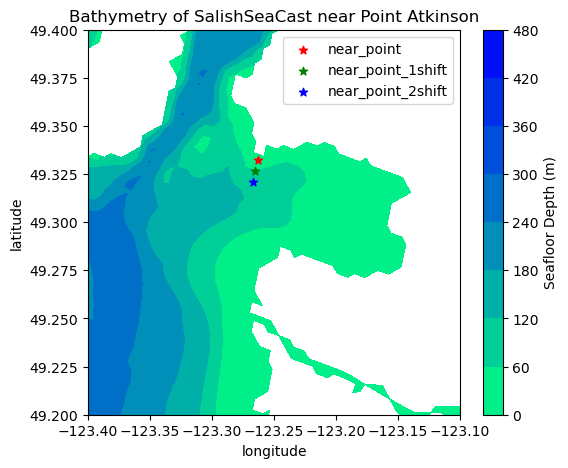

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
colours = ax.contourf(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap='winter_r')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('Bathymetry of SalishSeaCast near Point Atkinson')

ax.set_xlim([-123.4, -123.1])
ax.set_ylim([49.2, 49.4])

ax.scatter(bathy.nav_lon[near_point[1], near_point[0]].values, bathy.nav_lat[near_point[1], near_point[0]].values, color='red', marker='*', label='near_point')
ax.scatter(bathy.nav_lon[near_point_1shift[1], near_point_1shift[0]].values, bathy.nav_lat[near_point_1shift[1], near_point_1shift[0]].values, color='green', marker='*', label='near_point_1shift')
ax.scatter(bathy.nav_lon[near_point_2shift[1], near_point_2shift[0]].values, bathy.nav_lat[near_point_2shift[1], near_point_2shift[0]].values, color='blue', marker='*', label='near_point_2shift')

cb = fig.colorbar(colours, ax=ax)
cb.set_label('Seafloor Depth (m)');

ax.legend()

In [7]:
ns_saline = ds.vosaline[:, 5].sel(gridX=near_point[0], gridY=near_point[1]).values
ns_temper = ds.votemper[:, 5].sel(gridX=near_point[0], gridY=near_point[1]).values

ns_saline_1shift = ds.vosaline[:, 5].sel(gridX=near_point_1shift[0], gridY=near_point_1shift[1]).values
ns_temper_1shift = ds.votemper[:, 5].sel(gridX=near_point_1shift[0], gridY=near_point_1shift[1]).values

ns_saline_2shift = ds.vosaline[:, 5].sel(gridX=near_point_2shift[0], gridY=near_point_2shift[1]).values
ns_temper_2shift = ds.votemper[:, 5].sel(gridX=near_point_2shift[0], gridY=near_point_2shift[1]).values

In [8]:
# fig, ax1 = plt.subplots(1,1, figsize = (9, 5))

# color1 = 'tab:blue'
# ax1.plot(ds['time'], ns_saline, linestyle='-', color=color1)
# ax1.set_ylabel(r'Salinity $g/kg$', color=color1)
# ax1.tick_params(axis='y', labelcolor=color1)

# ax2 = ax1.twinx()
# color2 = 'tab:red'
# ax2.plot(ds['time'], ns_temper, linestyle='-', color=color2)
# ax2.set_ylabel(r'Temperature $^{\circ}C$', color=color2)
# ax2.tick_params(axis='y', labelcolor=color2)

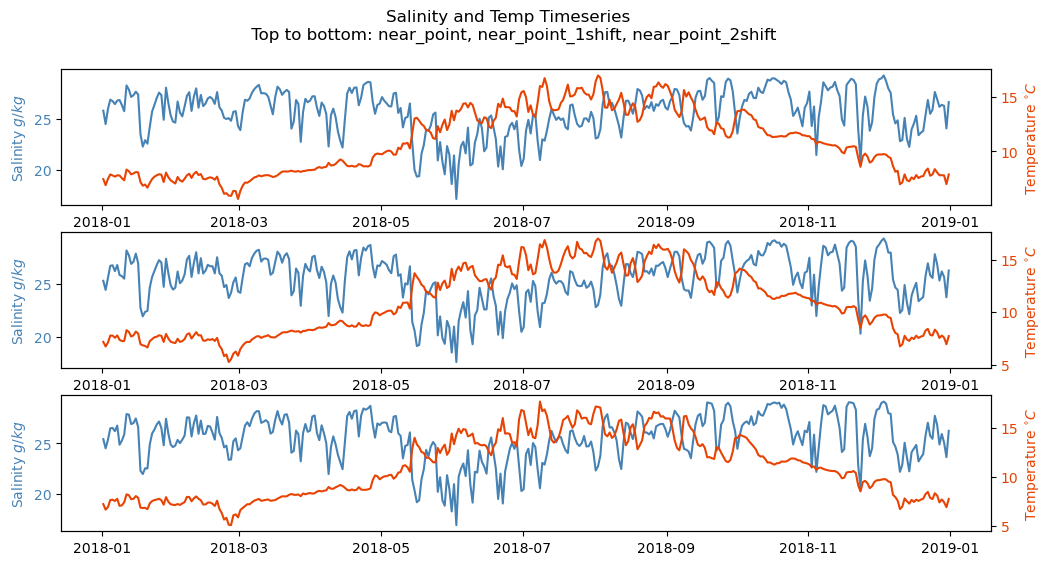

In [9]:
fig, ax1 = plt.subplots(3,1, figsize = (12, 6))

fig.suptitle('Salinity and Temp Timeseries \n Top to bottom: near_point, near_point_1shift, near_point_2shift')

color1 = '#4682B4'
color2 = '#e84302'

## near_point
ax1[0].plot(ds['time'], ns_saline, linestyle='-', color=color1)
ax1[0].set_ylabel(r'Salinity $g/kg$', color=color1)
ax1[0].tick_params(axis='y', labelcolor=color1)

ax2 = ax1[0].twinx()
ax2.plot(ds['time'], ns_temper, linestyle='-', color=color2)
ax2.set_ylabel(r'Temperature $^{\circ}C$', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

## near_point_1shift
ax1[1].plot(ds['time'], ns_saline_1shift, linestyle='-', color=color1)
ax1[1].set_ylabel(r'Salinity $g/kg$', color=color1)
ax1[1].tick_params(axis='y', labelcolor=color1)

ax2 = ax1[1].twinx()
ax2.plot(ds['time'], ns_temper_1shift, linestyle='-', color=color2)
ax2.set_ylabel(r'Temperature $^{\circ}C$', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

## near_point_2shift
ax1[2].plot(ds['time'], ns_saline_2shift, linestyle='-', color=color1)
ax1[2].set_ylabel(r'Salinity $g/kg$', color=color1)
ax1[2].tick_params(axis='y', labelcolor=color1)

ax2 = ax1[2].twinx()
ax2.plot(ds['time'], ns_temper_2shift, linestyle='-', color=color2)
ax2.set_ylabel(r'Temperature $^{\circ}C$', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

In [10]:
# fig, ax = plt.subplots(2,1, figsize = (10, 7))

# fig.suptitle('Histograms for 2018 \n Near Point ({:.2f} N, {:.2f} E),'.format(bathy.nav_lat[near_point[1], near_point[0]].values, bathy.nav_lon[near_point[1], near_point[0]].values))

# ax[0].hist(ns_saline, bins=20, color='tab:blue', edgecolor='black')
# ax[0].set_xlabel(r'Salinity $g/kg$')
# ax[0].set_ylabel(r'# Days')

# ax[1].hist(ns_temper, bins=20, color='tab:red', edgecolor='black')
# ax[1].set_xlabel(r'Temperature $^{\circ}C$')
# ax[1].set_ylabel(r'# Days')

# print('Mean Salinity:           {:.2f} (g/kg) \n\
# Variance Salinity:        {:.2f} (g/kg)\n\
# Standard Deviation Sal:   {:.2f} (g/kg)\n\
# Mean Temperature:         {:.2f} (degC)\n\
# Variance Temperature:     {:.2f} (degC)\n\
# Standard Deviation Temp:  {:.2f} (degC)'.format(ns_saline.mean(), \
#                                                 ns_saline.var(), ns_saline.std(), \
#                                                 ns_temper.mean(), ns_temper.var(), ns_temper.std()))

---- near_point ---------------- 
Mean Salinity:            25.71 (g/kg) 
Median Salinity:          26.13 (g/kg) 
Standard Deviation Sal:   2.19 (g/kg)
----------------
Mean Temperature:         10.86 (degC)
Median Temperature:       10.63 (degC) 
Standard Deviation Temp:  2.93 (degC)

---- near_point_1shift ---------------- 
Mean Salinity:            25.60 (g/kg) 
Median Salinity:          25.88 (g/kg) 
Standard Deviation Sal:   2.22 (g/kg)
----------------
Mean Temperature:         10.92 (degC)
Median Temperature:       10.64 (degC) 
Standard Deviation Temp:  3.06 (degC)

---- near_point_2shift ---------------- 
Mean Salinity:            25.56 (g/kg) 
Median Salinity:          25.89 (g/kg) 
Standard Deviation Sal:   2.27 (g/kg)
----------------
Mean Temperature:         10.96 (degC)
Median Temperature:       10.65 (degC) 
Standard Deviation Temp:  3.14 (degC)


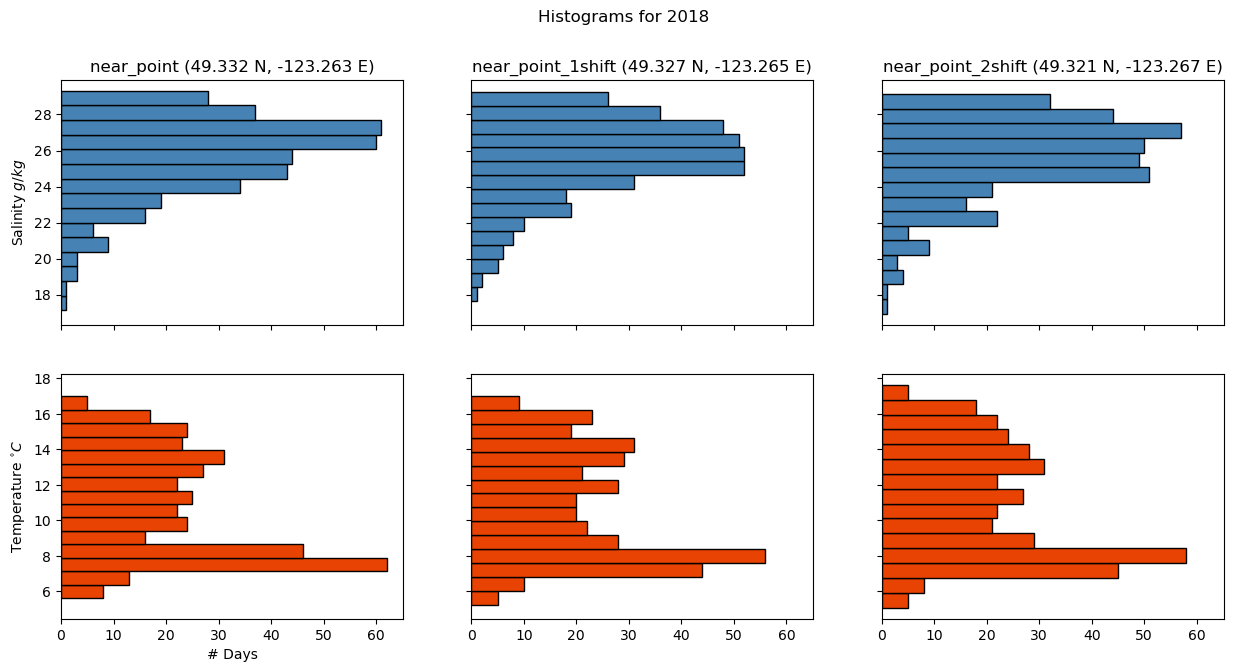

In [11]:
bin_num = 15

fig, ax = plt.subplots(2,3, figsize = (15, 7), sharey='row', sharex=True)

color1 = '#4682B4'
color2 = '#e84302'

fig.suptitle('Histograms for 2018')
ax[0,0].set_ylabel(r'Salinity $g/kg$')
ax[1,0].set_ylabel(r'Temperature $^{\circ}C$')
ax[1,0].set_xlabel(r'# Days')

## near_point
ax[0,0].set_title('near_point ({:.3f} N, {:.3f} E)'.format(bathy.nav_lat[near_point[1], near_point[0]].values, bathy.nav_lon[near_point[1], near_point[0]].values))
ax[0,0].hist(ns_saline, bins=bin_num, color=color1, edgecolor='black', orientation='horizontal')
ax[1,0].hist(ns_temper, bins=bin_num, color=color2, edgecolor='black', orientation='horizontal')

## near_point_1shift
ax[0,1].set_title('near_point_1shift ({:.3f} N, {:.3f} E)'.format(bathy.nav_lat[near_point_1shift[1], near_point_1shift[0]].values, bathy.nav_lon[near_point_1shift[1], near_point_1shift[0]].values))
ax[0,1].hist(ns_saline_1shift, bins=bin_num, color=color1, edgecolor='black', orientation='horizontal')
ax[1,1].hist(ns_temper_1shift, bins=bin_num, color=color2, edgecolor='black', orientation='horizontal')

## near_point_2shift
ax[0,2].set_title('near_point_2shift ({:.3f} N, {:.3f} E)'.format(bathy.nav_lat[near_point_2shift[1], near_point_2shift[0]].values, bathy.nav_lon[near_point_2shift[1], near_point_2shift[0]].values))
ax[0,2].hist(ns_saline_2shift, bins=bin_num, color=color1, edgecolor='black', orientation='horizontal')
ax[1,2].hist(ns_temper_2shift, bins=bin_num, color=color2, edgecolor='black', orientation='horizontal')

print('---- near_point ---------------- \n\
Mean Salinity:            {:.2f} (g/kg) \n\
Median Salinity:          {:.2f} (g/kg) \n\
Standard Deviation Sal:   {:.2f} (g/kg)\n----------------\n\
Mean Temperature:         {:.2f} (degC)\n\
Median Temperature:       {:.2f} (degC) \n\
Standard Deviation Temp:  {:.2f} (degC)'.format(ns_saline.mean(), \
                                                np.median(ns_saline), ns_saline.std(), \
                                                ns_temper.mean(), np.median(ns_temper), ns_temper.std()))

print('\n---- near_point_1shift ---------------- \n\
Mean Salinity:            {:.2f} (g/kg) \n\
Median Salinity:          {:.2f} (g/kg) \n\
Standard Deviation Sal:   {:.2f} (g/kg)\n----------------\n\
Mean Temperature:         {:.2f} (degC)\n\
Median Temperature:       {:.2f} (degC) \n\
Standard Deviation Temp:  {:.2f} (degC)'.format(ns_saline_1shift.mean(), \
                                                np.median(ns_saline_1shift), ns_saline_1shift.std(), \
                                                ns_temper_1shift.mean(), np.median(ns_temper_1shift), ns_temper_1shift.std()))

print('\n---- near_point_2shift ---------------- \n\
Mean Salinity:            {:.2f} (g/kg) \n\
Median Salinity:          {:.2f} (g/kg) \n\
Standard Deviation Sal:   {:.2f} (g/kg)\n----------------\n\
Mean Temperature:         {:.2f} (degC)\n\
Median Temperature:       {:.2f} (degC) \n\
Standard Deviation Temp:  {:.2f} (degC)'.format(ns_saline_2shift.mean(), \
                                                np.median(ns_saline_2shift), ns_saline_2shift.std(), \
                                                ns_temper_2shift.mean(), np.median(ns_temper_2shift), ns_temper_2shift.std()))